In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import tqdm as notebook_tqdm

#device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
'''model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name,  
                                            torch_dtype= "float16")
model.eval()'''

'model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"  \ntokenizer = AutoTokenizer.from_pretrained(model_name)\nmodel = AutoModelForCausalLM.from_pretrained(model_name,  \n                                            torch_dtype= "float16")\nmodel.eval()'

In [9]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import BitsAndBytesConfig

'''#quantization
bnb_config = BitsAndBytesConfig(load_in_8bit=True,        #or load_in_4bit=True for more compression
    llm_int8_threshold=6.0,
    llm_int8_skip_modules=None,
    #llm_int8_enable_fp32_cpu_offload=True
)'''

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")
                                                   #quantization_config = bnb_config)

In [10]:
model.eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo): 

In [17]:
#now checking how well it performs
import json 
import pprint
from functions import load_data

test_ques_1 = load_data('test', 'counting_and_probability', 2)
pprint.pprint(test_ques_1)




{'level': 'Level 4',
 'problem': 'We flip a fair coin 10 times.  What is the probability that we '
            'get heads in at least 6 of the 10 flips?',
 'solution': 'There are $2^{10} = 1024$ possible outcomes of the 10 coin '
             'flips. The probability that we flip at least 6 heads is equal to '
             'the probability that we flip at least 6 tails, by symmetry.  '
             "Let's call this probability $p$.  The only other possibility is "
             'that we flip exactly 5 heads and 5 tails, for which the '
             'probability is $\\dfrac{\\binom{10}{5}}{2^{10}} = '
             '\\dfrac{252}{1024} = \\dfrac{63}{256}$.  Therefore, '
             '$\\dfrac{63}{256} + 2p = 1$, giving $$ '
             'p=\\frac{1}{2}\\left(1-\\frac{63}{256}\\right)=\\boxed{\\frac{193}{512}} '
             '$$',
 'type': 'Counting & Probability'}


In [18]:
#evaluation = eval(test_data)

problem = test_ques_1['problem']
solution = test_ques_1['solution']

prompt = f"Solve this math problem step by step: {problem}"

inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
outputs = model.generate(**inputs, max_new_tokens=200)
generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

In [24]:
print("\nProblem:\n", problem)
print("Original Solution:\n", solution)
print("Model's Solution:\n", generated_answer)


Problem:
 If $e^{i \alpha} = \frac{3}{5}  +\frac{4}{5} i$ and $e^{i \beta} = -\frac{12}{13} + \frac{5}{13} i,$ then find $\cos (\alpha - \beta).$
Original Solution:
 Dividing the given equations, we obtain
\begin{align*}
e^{i (\alpha - \beta)} &= \frac{\frac{3}{5}  +\frac{4}{5} i}{-\frac{12}{13} + \frac{5}{13} i} \\
&= \frac{(\frac{3}{5}  +\frac{4}{5} i)(-\frac{12}{13} - \frac{5}{13} i)}{(-\frac{12}{13} + \frac{5}{13} i)(-\frac{12}{13} - \frac{5}{13} i)} \\
&= -\frac{16}{65} - \frac{63}{65} i.
\end{align*}But $e^{i (\alpha - \beta)} = \cos (\alpha - \beta) + i \sin (\alpha - \beta),$ so $\cos (\alpha - \beta) = \boxed{-\frac{16}{65}}.$
Model's Solution:
 cos = 35 +frac45 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35


In [25]:
#on different topic
test_ques_2 = load_data('test','precalculus',21)

problem = test_ques_2['problem']
solution = test_ques_2['solution']

prompt = f"Solve this math problem step by step: {problem}"

inputs = tokenizer(prompt, return_tensors="pt", truncation=True)
outputs = model.generate(**inputs, max_new_tokens=200)
generated_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("\nProblem:\n", problem)
print("Original Solution:\n", solution)
print("Model's Solution:\n", generated_answer)


Problem:
 If $e^{i \alpha} = \frac{3}{5}  +\frac{4}{5} i$ and $e^{i \beta} = -\frac{12}{13} + \frac{5}{13} i,$ then find $\cos (\alpha - \beta).$
Original Solution:
 Dividing the given equations, we obtain
\begin{align*}
e^{i (\alpha - \beta)} &= \frac{\frac{3}{5}  +\frac{4}{5} i}{-\frac{12}{13} + \frac{5}{13} i} \\
&= \frac{(\frac{3}{5}  +\frac{4}{5} i)(-\frac{12}{13} - \frac{5}{13} i)}{(-\frac{12}{13} + \frac{5}{13} i)(-\frac{12}{13} - \frac{5}{13} i)} \\
&= -\frac{16}{65} - \frac{63}{65} i.
\end{align*}But $e^{i (\alpha - \beta)} = \cos (\alpha - \beta) + i \sin (\alpha - \beta),$ so $\cos (\alpha - \beta) = \boxed{-\frac{16}{65}}.$
Model's Solution:
 cos = 35 +frac45 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35 i$ 35 i = 35


Human-Evaluation the model's answer is not right.

In [28]:
#on gm8k dataset
import joblib

X_train, X_test, y_train, y_test = joblib.load("split_data.joblib")


In [29]:

def generate_answer(question, max_tokens=128):
    input_ids = tokenizer(question, return_tensors="pt", truncation=True, padding=True).input_ids
    output_ids = model.generate(input_ids, max_length=max_tokens)
    return tokenizer.decode(output_ids[0], skip_special_tokens=True)

predictions = [generate_answer(q) for q in X_test]


In [30]:

correct = sum(str(pred).strip() == str(true).strip() for pred, true in zip(predictions, y_test))
incorrect = len(y_test) - correct
accuracy = correct / len(y_test)


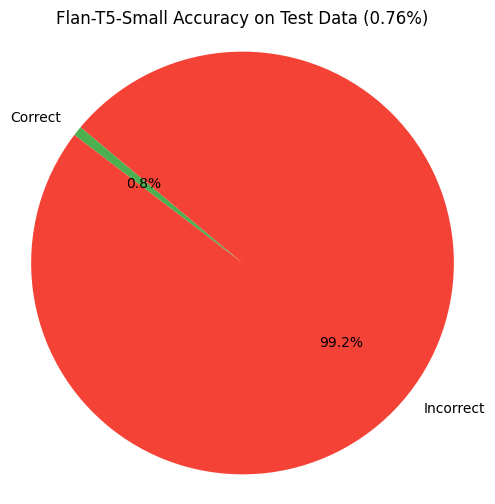

In [31]:
import matplotlib.pyplot as plt

labels = ['Correct', 'Incorrect']
sizes = [correct, incorrect]
colors = ['#4CAF50', '#F44336']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f"Flan-T5-Small Accuracy on Test Data ({accuracy:.2%})")
plt.axis('equal')
plt.show()


Performed worst on the test dataset.